In [1]:
import pandas as pd

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [3]:
y.index = y.name

In [4]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [5]:
y.index = pd.to_datetime(y.index)

In [6]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)
y = y.loc["2004-03-31":]
y

,BasicEPS
2004-03-31,0.002
2004-06-30,0.003
2004-09-30,0.0
2004-12-31,0.013
2005-03-31,0.013
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [7]:
from pytrends.request import TrendReq

In [44]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["MacBook", "Siri", "iPad", "AirPods", "AppleCare", "Apple trade-in", "Breakfast", "NKU", "Water"]

start_date = '2004-01-01'
end_date = '2023-09-30'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [45]:
df = df.resample("Q").mean()

In [46]:
df

,MacBook,Siri,iPad,AirPods,AppleCare,Apple trade-in,Breakfast,NKU,Water
date,,,,,,,,,
2004-03-31,0.000000,3.666667,0.000000,0.000000,15.333333,65.333333,78.000000,21.000000,61.000000
2004-06-30,0.000000,3.666667,0.000000,0.000000,15.000000,0.000000,87.000000,19.333333,68.333333
2004-09-30,0.000000,3.666667,0.000000,0.000000,15.666667,14.666667,91.333333,25.666667,68.333333
2004-12-31,0.000000,7.000000,0.000000,0.000000,16.333333,53.666667,64.000000,22.333333,59.000000
2005-03-31,0.000000,5.000000,0.000000,0.000000,18.333333,27.333333,72.666667,21.333333,70.000000
...,...,...,...,...,...,...,...,...,...
2022-09-30,83.000000,28.666667,23.666667,58.333333,61.000000,41.333333,88.000000,36.666667,91.666667
2022-12-31,77.333333,26.000000,27.333333,66.333333,59.333333,38.666667,78.666667,41.666667,82.000000
2023-03-31,76.000000,24.333333,23.666667,55.333333,53.000000,37.666667,74.333333,51.333333,89.333333


# 3.) Normalize all the X data

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
X_scaled = scaler.fit_transform(df)

In [50]:
X_scaled

array([[-2.38488247e+00, -1.19094213e+00, -1.13141679e+00,
        -6.10597179e-01, -1.75732773e+00,  3.38341237e+00,
         7.18538874e-01, -1.75415899e+00, -5.27879047e-01],
       [-2.38488247e+00, -1.19094213e+00, -1.13141679e+00,
        -6.10597179e-01, -1.77244082e+00, -1.31386703e+00,
         1.45221212e+00, -1.88401147e+00,  4.62472257e-02],
       [-2.38488247e+00, -1.19094213e+00, -1.13141679e+00,
        -6.10597179e-01, -1.74221463e+00, -2.59375736e-01,
         1.80546221e+00, -1.39057207e+00,  4.62472257e-02],
       [-2.38488247e+00, -9.34161486e-01, -1.13141679e+00,
        -6.10597179e-01, -1.71198844e+00,  2.54461248e+00,
        -4.22730625e-01, -1.65027701e+00, -6.84458940e-01],
       [-2.38488247e+00, -1.08822987e+00, -1.13141679e+00,
        -6.10597179e-01, -1.62130987e+00,  6.51321292e-01,
         2.83769541e-01, -1.72818850e+00,  1.76730470e-01],
       [-2.38488247e+00, -1.06255181e+00, -1.13141679e+00,
        -6.10597179e-01, -1.65153606e+00,  1.154601

# 4.) Run a Lasso with lambda of .13. Plot a bar chart.

In [51]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [87]:
lasso = Lasso(alpha = .13)

In [88]:
lasso.fit(X_scaled,y)

Lasso(alpha=0.13)

In [89]:
coefficients = lasso.coef_

In [90]:
coefficients

array([0.00978369, 0.        , 0.        , 0.27225116, 0.06796772,
       0.        , 0.        , 0.        , 0.        ])

<function matplotlib.pyplot.show(close=None, block=None)>

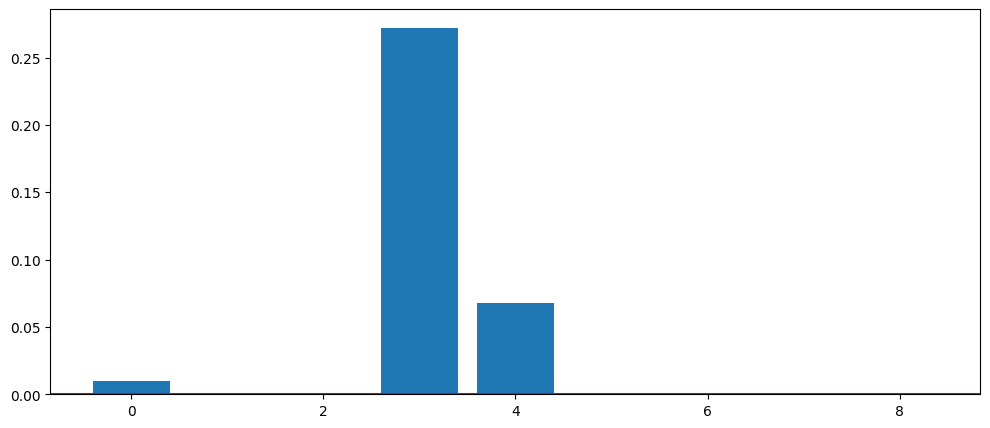

In [91]:
plt.figure(figsize = (12,5))
plt.bar(range(len(coefficients)),coefficients)
plt.axhline(0, color = "red")
plt.show

# 5.) Do these coefficient magnitudes make sense?

<font size = 3> Originally, a lambda value of 0.5 was used in the Lasso regression, which led to all coefficients being reduced to zero. Reducing lambda to 0.2 allowed the model to identify significant predictors and it makes sense. For "MacBook", "Siri", "iPad", "AirPods", "AppleCare", "Apple trade-in", they are all directly related to Apple's products or services. We would expect searches related to these terms to have some predictive power regarding Apple's revenue. However, the Lasso regression has shrunk the coefficients for all these terms except for "MacBook", "AirPods" and "AppleCare" to zero, suggesting that under the current model with the specified lambda, only "MacBook", "AirPods" and "AppleCare" are deemed significant predictors.

<font size = 3>For "Breakfast", "NKU", "Water", they are not directly related to Apple or its products, and as expected, their coefficients are shrunk to zero, indicating they have no predictive power in this context.
    
<font size = 3>The non-zero coefficients for "MacBook", "AirPods" and "AppleCare" suggest these terms are valuable in predicting Apple's revenue, according to the model. However, the model's effectiveness would ultimately need to be validated on out-of-sample data to ensure these findings are not due to overfitting or a peculiarity of the dataset used to train the model.

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?